<a href="https://colab.research.google.com/github/MELDRICELMANCO/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)



tienda["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"

df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

tienda.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



     tienda  Facturación Total
0  Tienda 1       1.150880e+09
1  Tienda 2       1.116344e+09
2  Tienda 3       1.098020e+09
3  Tienda 4       1.038376e+09


<ipython-input-40-967cb58a0092>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=facturacion_total, x="tienda", y="Facturación Total", palette="Blues_d")


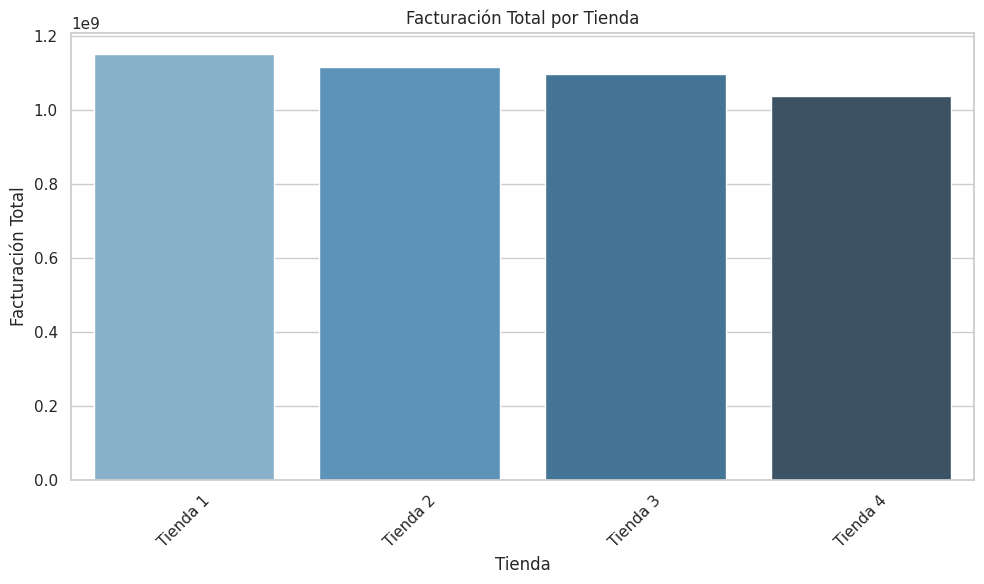

In [40]:
# Crear columna de total de venta (asumimos que cada fila es una unidad vendida)
df["total_venta"] = df["Precio"]

# Calcular facturación total por tienda
facturacion_total = df.groupby("tienda")["total_venta"].sum().reset_index(name="Facturación Total")
print(facturacion_total)

# Configuración general de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


sns.barplot(data=facturacion_total, x="tienda", y="Facturación Total", palette="Blues_d")
plt.title("Facturación Total por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación Total")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

     tienda Categoría del Producto  ventas
0  Tienda 1                Muebles     465
1  Tienda 2                Muebles     442
2  Tienda 3                Muebles     499
3  Tienda 4                Muebles     480


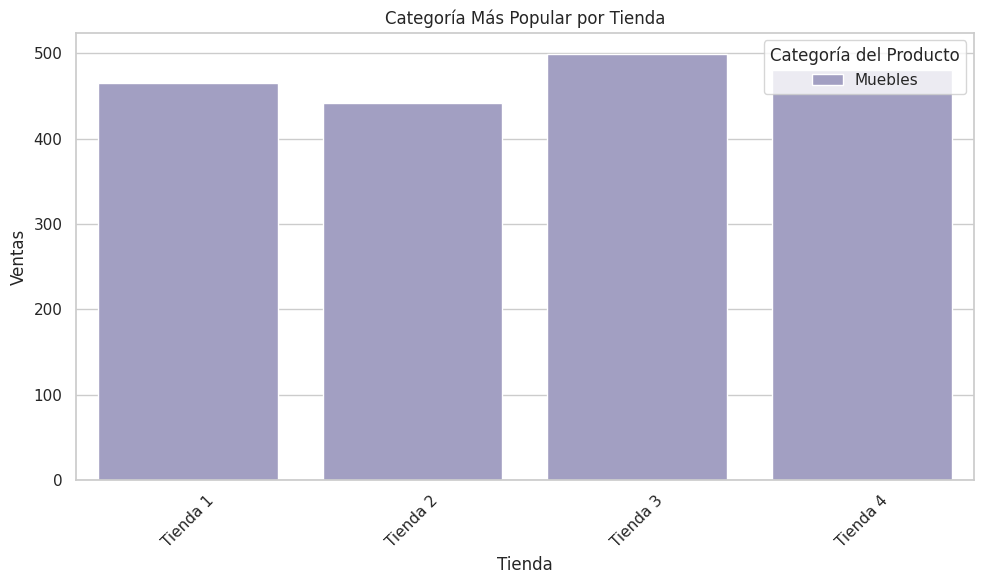

In [37]:
# Contar la cantidad de ventas por categoría en cada tienda
categorias_populares = df.groupby(["tienda", "Categoría del Producto"]).size().reset_index(name="ventas")

# Obtener la categoría más vendida por tienda
categorias_top = categorias_populares.sort_values(["tienda", "ventas"], ascending=[True, False])
categoria_mas_popular = categorias_top.groupby("tienda").head(1).reset_index(drop=True)
print(categoria_mas_popular)


sns.barplot(data=categoria_mas_popular, x="tienda", y="ventas", hue="Categoría del Producto", palette="Purples")
plt.title("Categoría Más Popular por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# 3. Calificación promedio de la tienda


     tienda  Promedio Calificación
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


<ipython-input-35-64561474ae3c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_calificacion, x="tienda", y="Promedio Calificación", palette="Greens_d")


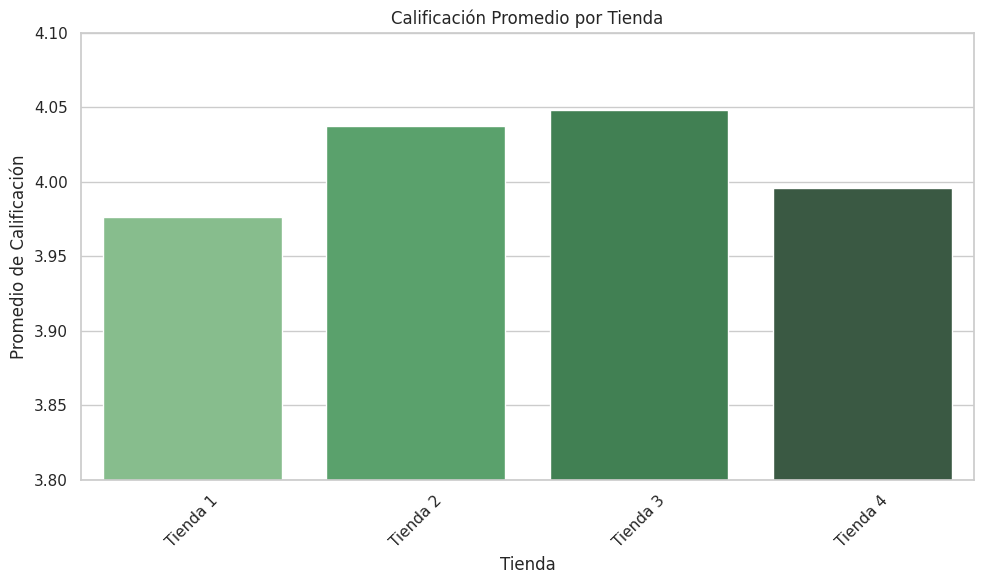

In [35]:
# Calcular el promedio de calificación de los clientes por tienda
promedio_calificacion = df.groupby("tienda")["Calificación"].mean().reset_index(name="Promedio Calificación")
print(promedio_calificacion)

sns.barplot(data=promedio_calificacion, x="tienda", y="Promedio Calificación", palette="Greens_d")
plt.title("Calificación Promedio por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Promedio de Calificación")
plt.ylim(3.8, 4.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

     tienda                   Producto  cantidad_vendida
0  Tienda 1                    Armario                60
1  Tienda 2  Iniciando en programación                65
2  Tienda 3              Kit de bancas                57
3  Tienda 4                   Cama box                62
     tienda                   Producto  cantidad_vendida
0  Tienda 1  Auriculares con micrófono                33
1  Tienda 2              Juego de mesa                32
2  Tienda 3    Bloques de construcción                35
3  Tienda 4         Guitarra eléctrica                33


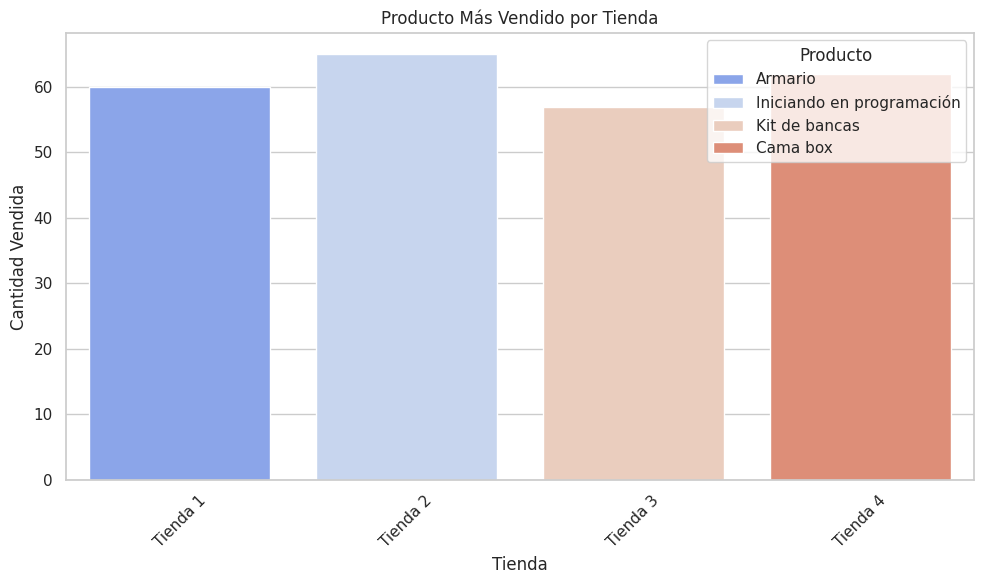

In [38]:
# Contar cantidad de ventas por producto en cada tienda
productos_vendidos = df.groupby(["tienda", "Producto"]).size().reset_index(name="cantidad_vendida")

# Producto más vendido por tienda
productos_top = productos_vendidos.sort_values(["tienda", "cantidad_vendida"], ascending=[True, False])
producto_mas_vendido = productos_top.groupby("tienda").head(1).reset_index(drop=True)
print(producto_mas_vendido)

# Producto menos vendido por tienda
productos_bottom = productos_vendidos.sort_values(["tienda", "cantidad_vendida"], ascending=[True, True])
producto_menos_vendido = productos_bottom.groupby("tienda").head(1).reset_index(drop=True)
print(producto_menos_vendido)

sns.barplot(data=producto_mas_vendido, x="tienda", y="cantidad_vendida", hue="Producto", palette="coolwarm")
plt.title("Producto Más Vendido por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



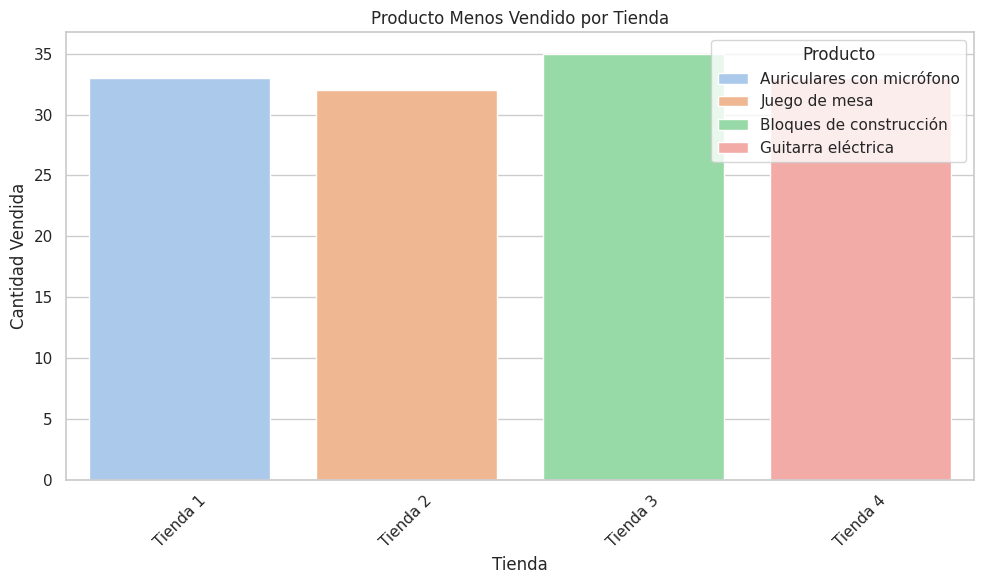

In [39]:

sns.barplot(data=producto_menos_vendido, x="tienda", y="cantidad_vendida", hue="Producto", palette="pastel")
plt.title("Producto Menos Vendido por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

     tienda  Costo Promedio Envío
0  Tienda 1          26018.609580
1  Tienda 2          25216.235693
2  Tienda 3          24805.680373
3  Tienda 4          23459.457167


<ipython-input-36-b72d6f900bed>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=costo_promedio_envio, x="tienda", y="Costo Promedio Envío", palette="Oranges_d")


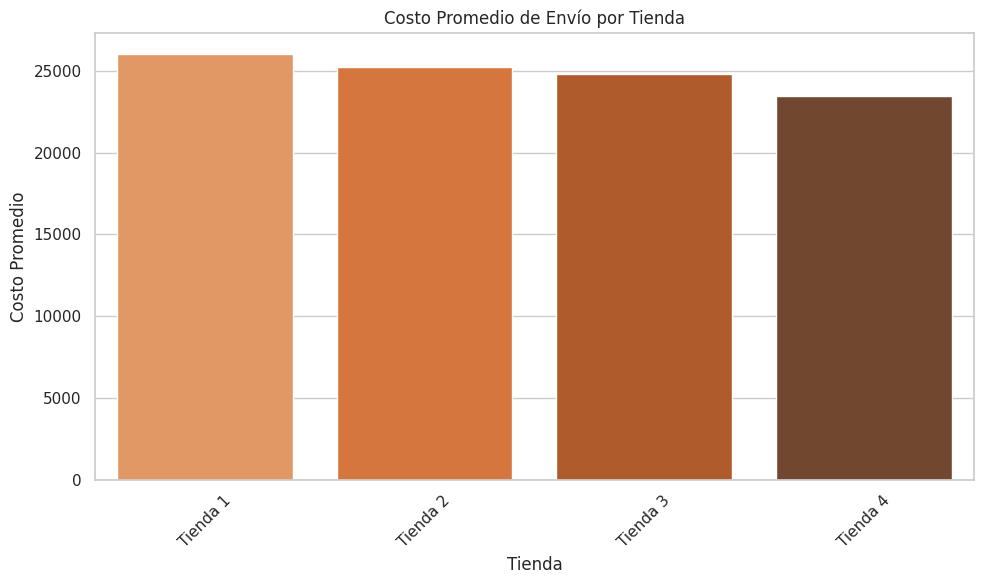

In [36]:
# Calcular el costo promedio del envío por tienda
costo_promedio_envio = df.groupby("tienda")["Costo de envío"].mean().reset_index(name="Costo Promedio Envío")
print(costo_promedio_envio)



sns.barplot(data=costo_promedio_envio, x="tienda", y="Costo Promedio Envío", palette="Oranges_d")
plt.title("Costo Promedio de Envío por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Señor Juan,**Tras realizar un análisis detallado del desempeño de las cuatro tiendas disponibles, y utilizando los siguientes cinco criterios clave de evaluación:

* Facturación total

* Categorías más populares

* Promedio de calificación de los clientes

* Productos más y menos vendidos

* Costo promedio del envío

hemos llegado a una conclusión basada en datos objetivos.

# Análisis detallado
* **Facturación Total:** Tienda 4 tiene la menor facturación, lo cual indica menor volumen de ventas o menor valor de los productos vendidos.

* **Calificación Promedio:** Aunque Tienda 4 no es la peor calificada, tampoco destaca, con un promedio de 4.00. Tienda 3 y 2 superan este valor.

* **Costo Promedio de Envío:** Es el más bajo, pero esto puede deberse a estrategias de ahorro, y no necesariamente a eficiencia. Un costo bajo no compensa un bajo rendimiento general.

* **Categoría más popular y productos más vendidos:** Tienda 4 tiene buen movimiento en la categoría de Muebles, pero no lidera en ningún aspecto clave, y sus productos más vendidos tampoco superan claramente a los de otras tiendas.

# Conclusión
Recomendamos vender la Tienda 4, ya que:



*   Es la tienda con menor desempeño general.
*   No lidera en ningún indicador clave.
*   Tiene la menor facturación, lo cual impacta directamente en la rentabilidad.
*   Aunque su costo de envío es bajo, los márgenes generales son insuficientes frente a las otras tiendas.

Con esta decisión, podrá mantener las tiendas con mayor potencial de crecimiento y retorno de inversión, concentrando esfuerzos en las más rentables y mejor calificadas.

